# Minha Analise

In [522]:
import dask.dataframe as dd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipfile

In [523]:
!wget http://download.inep.gov.br/microdados/microdados_enem_2019.zip
with zipfile.ZipFile('./microdados_enem_2019.zip', 'r') as zip_ref:
    zip_ref.extract("DADOS/MICRODADOS_ENEM_2019.csv")
df = dd.read_csv('./DADOS/MICRODADOS_ENEM_2019.csv',encoding = "ISO-8859-1", sep=";") # Importaçao dos dados totais
enem_uberlandia = df.query('NO_MUNICIPIO_RESIDENCIA == "Uberlândia"').compute()

In [524]:
fonte_Imersao = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
amostra = pd.read_csv(fonte_Imersao)

## Analise (ausencia X automovel)

Ao refletir sobre os participantes que perdem a prova (os faltantes) podemos enxergar uma clara relaçao entre possuir carro e faltar algum dia na prova, no grafico abaixo podemos ver que o o percentual de pessoas que nao possuem carro e faltaram ao menos um dia na prova é quase 50%

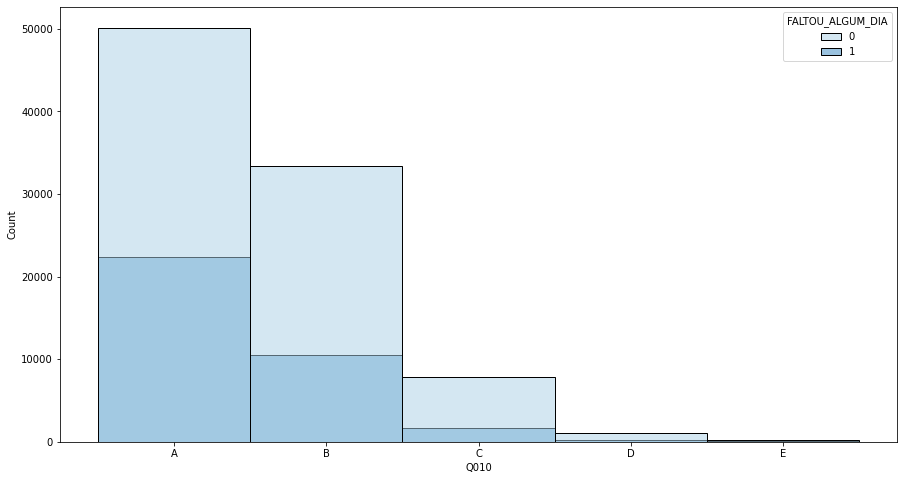

In [525]:
enem_uberlandia['FALTOU_ALGUM_DIA'] = np.where((enem_uberlandia['TP_PRESENCA_LC'] == 0) | (enem_uberlandia['TP_PRESENCA_MT'] == 0),1,0) 
amostra['FALTOU_ALGUM_DIA'] = np.where((amostra['TP_PRESENCA_LC'] == 0) | (amostra['TP_PRESENCA_MT'] == 0),1,0)
# Aqui mostra como criar uma coluna condicional para 2 valores, para mais valores olhar o link na primeira celula
plt.figure(figsize=(15,8))
sns.histplot(data = amostra.sort_values('Q010'),x='Q010', hue ='FALTOU_ALGUM_DIA', palette='Blues')

In [526]:
# Criando uma nova coluna numerica para carros, motos, e automoveis(carros + motos)

#Para a cidade de Uberlândia
condicoes_carros = [
    (enem_uberlandia['Q010'] == 'A'),
    (enem_uberlandia['Q010'] == 'B'),
    (enem_uberlandia['Q010'] == 'C'),
    (enem_uberlandia['Q010'] == 'D'),
    (enem_uberlandia['Q010'] == 'E')
]
condicoes_motos = [
    (enem_uberlandia['Q011'] == 'A'),
    (enem_uberlandia['Q011'] == 'B'),
    (enem_uberlandia['Q011'] == 'C'),
    (enem_uberlandia['Q011'] == 'D'),
    (enem_uberlandia['Q011'] == 'E')
]
escolhas = [0,1,2,3,4]

enem_uberlandia['Carros'] = np.select(condicoes_carros,escolhas)
enem_uberlandia['Motos'] = np.select(condicoes_motos,escolhas)
enem_uberlandia['Automoveis'] = enem_uberlandia['Carros'] + enem_uberlandia['Motos']

# Para a amostra obtida na Imersão

condicoes_carros = [
    (amostra['Q010'] == 'A'),
    (amostra['Q010'] == 'B'),
    (amostra['Q010'] == 'C'),
    (amostra['Q010'] == 'D'),
    (amostra['Q010'] == 'E')
]
condicoes_motos = [
    (amostra['Q011'] == 'A'),
    (amostra['Q011'] == 'B'),
    (amostra['Q011'] == 'C'),
    (amostra['Q011'] == 'D'),
    (amostra['Q011'] == 'E')
]
escolhas = [0,1,2,3,4]

amostra['Carros'] = np.select(condicoes_carros,escolhas)
amostra['Motos'] = np.select(condicoes_motos,escolhas)
amostra['Automoveis'] = amostra['Carros'] + amostra['Motos']

In [527]:
amostra['Presenca_automovel'] = np.where(amostra['Automoveis'] == 0,'Nao possui','Possui')
enem_uberlandia['Presenca_automovel'] = np.where(enem_uberlandia['Automoveis'] == 0,'Nao possui','Possui')

amostra_presentes = amostra.query('FALTOU_ALGUM_DIA == 0')['Presenca_automovel'].value_counts(normalize =True)*100
amostra_faltantes = amostra.query('FALTOU_ALGUM_DIA == 1')['Presenca_automovel'].value_counts(normalize =True)*100

faltantes_vs_automoveis = pd.DataFrame({'Faltou algum dia': amostra_faltantes,
                                        'Nao faltou': amostra_presentes})
                                        
enem_uberlandia_presentes = enem_uberlandia.query('FALTOU_ALGUM_DIA == 0')['Presenca_automovel'].value_counts(normalize =True)*100
enem_uberlandia_faltantes = enem_uberlandia.query('FALTOU_ALGUM_DIA == 1')['Presenca_automovel'].value_counts(normalize =True)*100

faltantes_vs_automoveis_uberlandia = pd.DataFrame({'Faltou algum dia': enem_uberlandia_faltantes,
                                                   'Nao faltou': enem_uberlandia_presentes})

## Amostra vs Uberlândia

O grafico abaixo realiza uma comparaçao entre a cidade de Uberlândia, com o restante do Brasil (dados retirados da amostra utilizada na Imersão).<br/>

Analisando os gráficos, é possivel notar que dentre as pessoas que nao possuem automóveis, a quantidade percentual de participantes faltantes é bem maior do que quando estes individuos possuem automóveis.<br/>
Ao comparar a cidade de Uberlândia, com a amostra, podemos ver que a quantidade de pessoas que possuem automóveis é maior em Uberlândia, pois notamos que tanto o grupo dos faltantes, quanto dos presentes, aumentam quando analisamos a presença de automóvel, um possivel motivo é devido a Uberlândia se encontrar no ranking 22 de PIB no Brasil.<br/>
<br/>
<br/>


fontes:
<br/>https://cidades.ibge.gov.br/brasil/mg/uberlandia/pesquisa/38/47001?tipo=ranking&localidade1=0


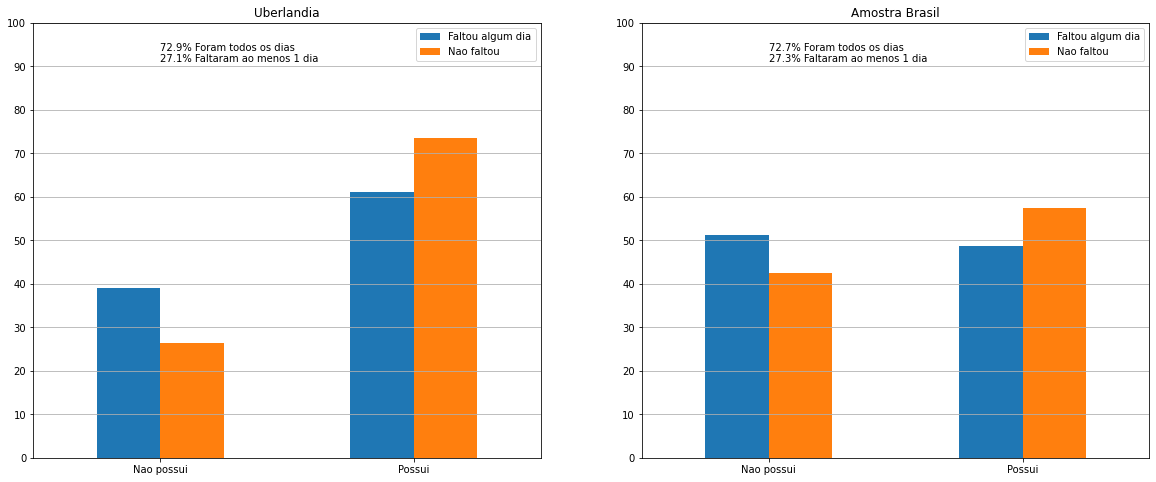

In [528]:
f,axs = plt.subplots(1,2,figsize=(20,8))
faltantes_vs_automoveis_uberlandia.sort_index().plot.bar(ax = axs[0] )
faltantes_vs_automoveis.plot.bar(ax = axs[1])
axs[0].set_title('Uberlandia')
axs[1].set_title('Amostra Brasil')
axs[0].grid(True,axis = 'y')
axs[1].grid(True,axis = 'y')
axs[0].set_ylim(0,100)
axs[1].set_ylim(0,100)
axs[0].set_yticks(np.arange(0,101,10))
axs[1].set_yticks(np.arange(0,101,10))
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=0)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=0)
presenca_uberlandia = enem_uberlandia['FALTOU_ALGUM_DIA'].value_counts(normalize =True)*100
presenca_amostra = amostra['FALTOU_ALGUM_DIA'].value_counts(normalize =True)*100
axs[0].text(0,91,f"{round(presenca_uberlandia[0],1)}% Foram todos os dias\n{round(presenca_uberlandia[1],1)}% Faltaram ao menos 1 dia")
axs[1].text(0,91,f"{round(presenca_amostra[0],1)}% Foram todos os dias\n{round(presenca_amostra[1],1)}% Faltaram ao menos 1 dia")

plt.show()


### Escolas urbanas vs escolas rurais
<br/>
As escolas rurais brasileiras necessitam de mais infraestrutura, o que deixa isto nitido é o grafico abaixo, quando comparamos as notas das pessoas que realizaram a prova que estudaram em uma escola urbana, com as notas das escolas rurais.

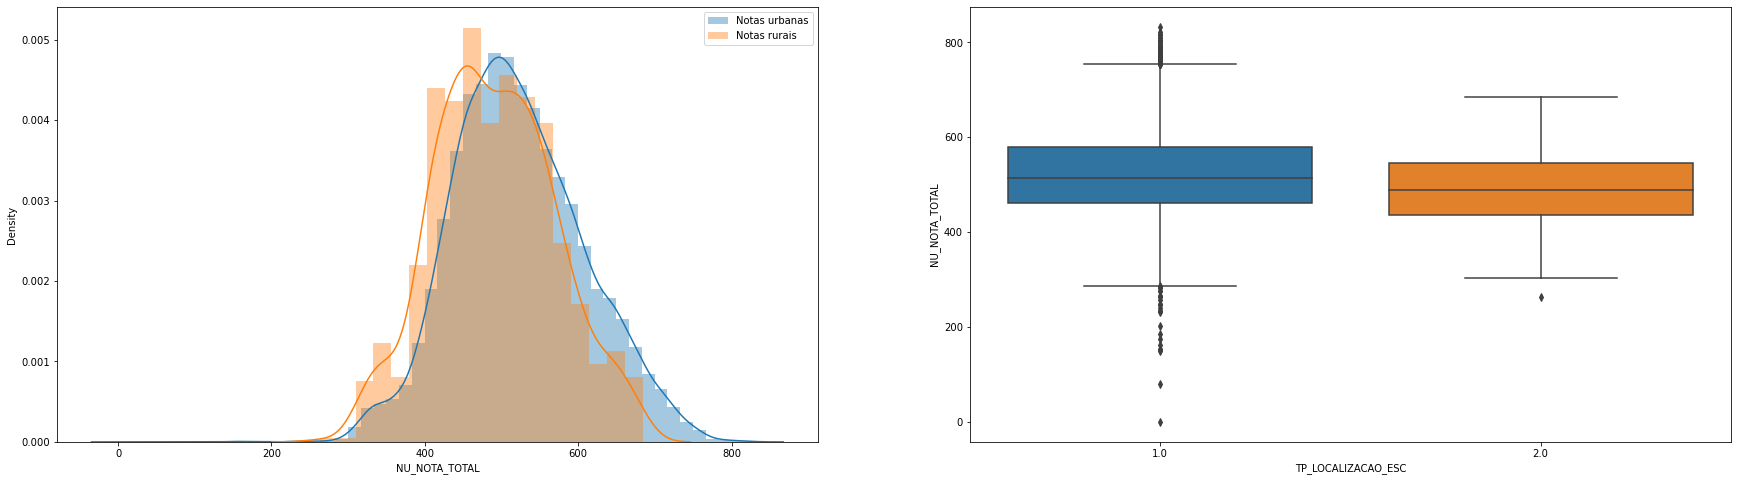

In [529]:
prova = ['NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_REDACAO']
amostra['NU_NOTA_TOTAL'] = amostra[prova].sum(axis = 1)/len(prova)
enem_uberlandia['NU_NOTA_TOTAL'] =enem_uberlandia[prova].sum(axis = 1)/len(prova)

amostra_sem_faltantes = amostra.query('TP_PRESENCA_MT != 0 & TP_PRESENCA_LC != 0')
plt.figure(figsize=(30,8))
ax1 = plt.subplot(122)
sns.boxplot(data = amostra_sem_faltantes, x = 'TP_LOCALIZACAO_ESC',y = 'NU_NOTA_TOTAL',ax = ax1)
ax2 = plt.subplot(121)
sns.distplot(amostra_sem_faltantes.query('TP_LOCALIZACAO_ESC == 1')['NU_NOTA_TOTAL'],ax = ax2,label = 'Notas urbanas')
sns.distplot(amostra_sem_faltantes.query('TP_LOCALIZACAO_ESC == 2')['NU_NOTA_TOTAL'],ax=ax2,label = 'Notas rurais')
plt.legend()
plt.show()


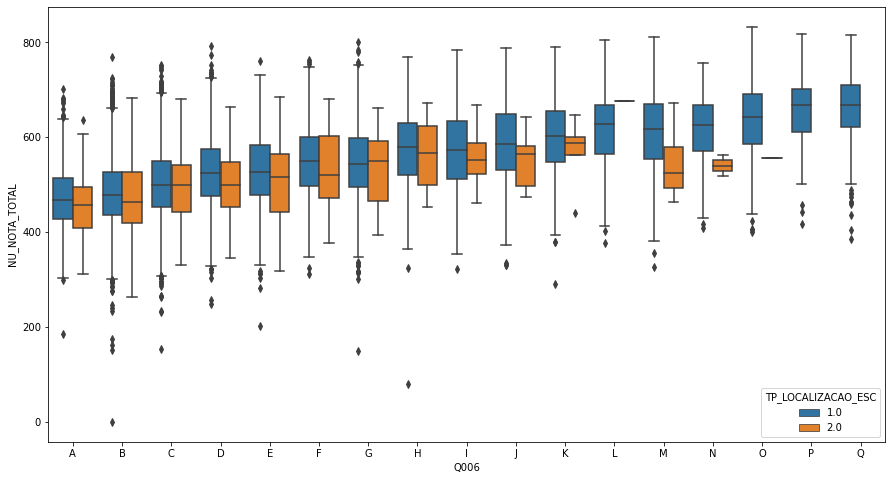

In [530]:
listaOrdenaRenda = amostra_sem_faltantes["Q006"].unique()
listaOrdenaRenda.sort()
listaOrdenaRenda
plt.figure(figsize = (15,8))
ax1 = plt.subplot(111)

sns.boxplot(data = amostra_sem_faltantes, x = 'Q006',y = 'NU_NOTA_TOTAL',hue = 'TP_LOCALIZACAO_ESC',order = listaOrdenaRenda,ax =ax1)



### Prediçao de notas

Desta vez, levando em consideração a idade e cada uma das notas de redação separadamente

In [531]:
colAnalisadas = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN','NU_NOTA_REDACAO', 'NU_IDADE','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']

inColumns = ['NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_CN','NU_NOTA_REDACAO', 'NU_IDADE','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']
outColumns = ['NU_NOTA_LC']

amostra_sem_zero = amostra.query('NU_NOTA_TOTAL != 0')
enem_uberlandia_sem_zero = enem_uberlandia.query('NU_NOTA_TOTAL != 0')

amostra_sem_zero = amostra_sem_zero[colAnalisadas].dropna()

enem_uberlandia_sem_zero = enem_uberlandia_sem_zero[colAnalisadas].dropna()

am_inData = amostra_sem_zero[inColumns]
am_outData = amostra_sem_zero[outColumns]
udi_inData = enem_uberlandia_sem_zero[inColumns]
udi_outData = enem_uberlandia_sem_zero[outColumns]

In [532]:
amX,udiX = am_inData, udi_inData
amY, udiY = am_outData, udi_outData

seed = 3216

In [533]:
from sklearn.model_selection import train_test_split as tts
np.random.seed(seed)

amX_treino, amX_teste, amY_treino, amY_teste = tts(amX,amY,test_size =0.25)
udiX_treino, udiX_teste, udiY_treino, udiY_teste = tts(udiX,udiY,test_size =0.25)

In [534]:
from sklearn.svm import LinearSVR
np.random.seed(seed)

amModelo = LinearSVR()
amModelo.fit(amX_treino,amY_treino)
predicoes_ch = amModelo.predict(amX_teste)

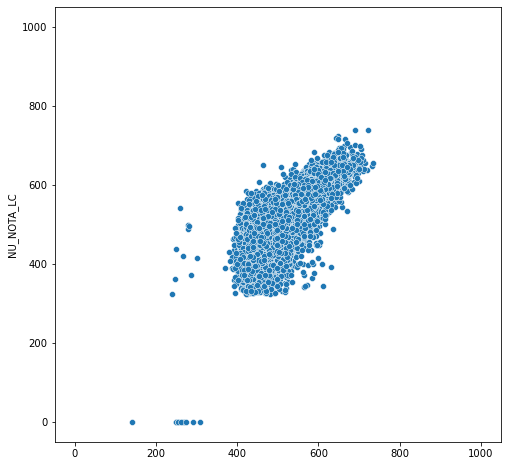

In [535]:
plt.figure(figsize=(8,8))
plt.xlim((-50,1050))
plt.ylim((-50,1050))
sns.scatterplot(x = predicoes_lc, y = amY_teste['NU_NOTA_LC'])